In [1]:
import os
import PIL
import numpy as np
from glob import glob
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential, load_model, model_from_json, Model

In [15]:
train_dir ='/Users/aayushrangra/Desktop/GrapeVine_Disease_Detection/custom_dataset/train'
valid_dir ='/Users/aayushrangra/Desktop/GrapeVine_Disease_Detection/custom_dataset/valid'
test_dir = '/Users/aayushrangra/Desktop/GrapeVine_Disease_Detection/custom_dataset/test'

num_classes = 4

In [16]:
IMAGE_SIZE = [224, 224]

train_gen = ImageDataGenerator(
    rescale=1./255
    )
val_gen = ImageDataGenerator(
    rescale=1./255
    )  
test_gen = ImageDataGenerator(
    rescale=1./255
    )


train_set = train_gen.flow_from_directory(
    train_dir,
    class_mode = 'categorical',
    target_size = IMAGE_SIZE,
    batch_size = 16
    )
val_set = val_gen.flow_from_directory(
    valid_dir,
    class_mode = 'categorical',
    target_size = IMAGE_SIZE,
    batch_size = 16
    )
test_set = test_gen.flow_from_directory(
    test_dir,
    class_mode = 'categorical',
    target_size = IMAGE_SIZE,
    batch_size = 16
)

Found 8400 images belonging to 4 classes.
Found 1800 images belonging to 4 classes.
Found 1800 images belonging to 4 classes.


In [17]:
from keras.models import Model
from keras.layers import Flatten, Dense, BatchNormalization
from keras.applications import VGG16
#from keras.preprocessing import image

input_shape = (224, 224, 3) # we will keep the image size as (64,64). You can increase the size for better results. 
inception = tf.keras.applications.inception_v3.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)
# this will exclude the initial layers from training phase as there are already been trained.
for layer in inception.layers:
    layer.trainable = False

from tensorflow.keras.layers import Dropout
x = Flatten()(inception.output)
x = Dropout(0.5)(x)
output_layer = Dense(4, activation='softmax')(x)
model = Model(inputs=inception.input, outputs=output_layer)

In [18]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

                                                                                                  
 conv2d_105 (Conv2D)         (None, 25, 25, 32)           6144      ['average_pooling2d_9[0][0]'] 
                                                                                                  
 batch_normalization_99 (Ba  (None, 25, 25, 64)           192       ['conv2d_99[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_101 (B  (None, 25, 25, 64)           192       ['conv2d_101[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_104 (B  (None, 25, 25, 96)           288       ['conv2d_104[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_111 (Activation  (None, 25, 25, 96)           0         ['batch_normalization_111[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_112 (Activation  (None, 25, 25, 64)           0         ['batch_normalization_112[0][0
 )                                                                  ]']                           
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_106[0][0]',      
                                                                     'activation_108[0][0]',      
          

 )                                                                  ]']                           
                                                                                                  
 conv2d_122 (Conv2D)         (None, 25, 25, 96)           55296     ['activation_121[0][0]']      
                                                                                                  
 batch_normalization_122 (B  (None, 25, 25, 96)           288       ['conv2d_122[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_122 (Activation  (None, 25, 25, 96)           0         ['batch_normalization_122[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_12

                                                                                                  
 conv2d_124 (Conv2D)         (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_127 (Conv2D)         (None, 12, 12, 192)          172032    ['activation_126[0][0]']      
                                                                                                  
 conv2d_132 (Conv2D)         (None, 12, 12, 192)          172032    ['activation_131[0][0]']      
                                                                                                  
 conv2d_133 (Conv2D)         (None, 12, 12, 192)          147456    ['average_pooling2d_12[0][0]']
                                                                                                  
 batch_normalization_124 (B  (None, 12, 12, 192)          576       ['conv2d_124[0][0]']          
 atchNorma

 activation_141 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_141[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_13 (Aver  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_134 (Conv2D)         (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_137 (Conv2D)         (None, 12, 12, 192)          215040    ['activation_136[0][0]']      
                                                                                                  
 conv2d_14

 atchNormalization)                                                                               
                                                                                                  
 activation_146 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_146[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_151 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_151[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_14 (Aver  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 agePooling2D)                                                                                    
          

                                                                                                  
 batch_normalization_156 (B  (None, 12, 12, 192)          576       ['conv2d_156[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_161 (B  (None, 12, 12, 192)          576       ['conv2d_161[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_156 (Activation  (None, 12, 12, 192)          0         ['batch_normalization_156[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 )                                                                  ]']                           
                                                                                                  
 conv2d_165 (Conv2D)         (None, 5, 5, 320)            552960    ['activation_164[0][0]']      
                                                                                                  
 conv2d_169 (Conv2D)         (None, 5, 5, 192)            331776    ['activation_168[0][0]']      
                                                                                                  
 batch_normalization_165 (B  (None, 5, 5, 320)            960       ['conv2d_165[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_169 (B  (None, 5, 5, 192)            576       ['conv2d_169[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_176 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_176[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_177 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_177[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_178 (B  (None, 5, 5, 192)            576       ['conv2d_178[0][0]']          
 atchNormalization)                                                                               
          

 )                                                                  ]']                           
                                                                                                  
 activation_182 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_182[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_185 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_185[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_186 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_186[0][0
 )                                                                  ]']                           
          

In [19]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-5),
    metrics=['accuracy']
    )

In [20]:
inception_model = model.fit(
     train_set,
     validation_data=val_set, 
     epochs=10,
     steps_per_epoch = len(train_set),
     validation_steps = len(val_set),)

Epoch 1/10
525/525 [==============================] - 140s 260ms/step - loss: 0.7637 - accuracy: 0.7021 - val_loss: 0.2950 - val_accuracy: 0.9089
Epoch 2/10
525/525 [==============================] - 106s 202ms/step - loss: 0.2793 - accuracy: 0.9044 - val_loss: 0.1816 - val_accuracy: 0.9456
Epoch 3/10
525/525 [==============================] - 63s 121ms/step - loss: 0.1793 - accuracy: 0.9421 - val_loss: 0.1330 - val_accuracy: 0.9594
Epoch 4/10
525/525 [==============================] - 63s 120ms/step - loss: 0.1355 - accuracy: 0.9577 - val_loss: 0.1199 - val_accuracy: 0.9633
Epoch 5/10
525/525 [==============================] - 67s 128ms/step - loss: 0.1067 - accuracy: 0.9656 - val_loss: 0.0912 - val_accuracy: 0.9739
Epoch 6/10
525/525 [==============================] - 66s 126ms/step - loss: 0.0910 - accuracy: 0.9715 - val_loss: 0.0865 - val_accuracy: 0.9761
Epoch 7/10
525/525 [==============================] - 67s 128ms/step - loss: 0.0725 - accuracy: 0.9779 - val_loss: 0.0727 - val_

In [21]:
acc = inception_model.history['accuracy']
val_acc = inception_model.history['val_accuracy']

loss = inception_model.history['loss']
val_loss = inception_model.history['val_loss']

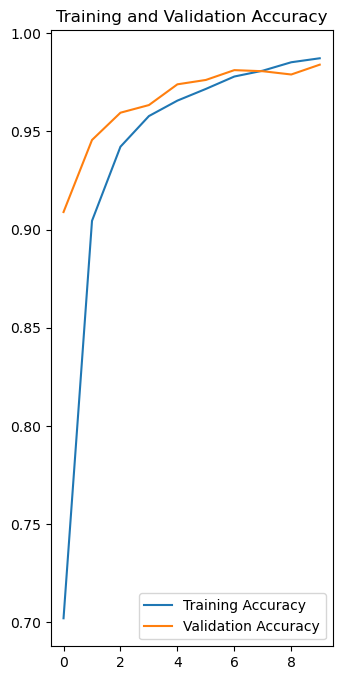

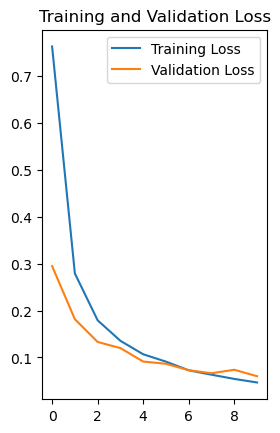

In [22]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
predictions = model.predict(test_set)

113/113 [==============================] - 13s 103ms/step


In [24]:
y_pred = np.argmax(predictions, axis=-1)

In [25]:
test_set.class_indices

{'Black Rot': 0, 'ESCA': 1, 'Healthy': 2, 'Leaf Blight': 3}

In [26]:
scores = model.evaluate(test_set, batch_size=16, verbose=2)

113/113 - 11s - loss: 0.0775 - accuracy: 0.9739 - 11s/epoch - 99ms/step


In [27]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score

# Assuming you have the true labels for your test set
true_labels = test_set.classes

# Convert predicted labels to one-hot encoding
one_hot_predictions = tf.keras.utils.to_categorical(y_pred, num_classes=num_classes)

# Get the predicted labels (as integers) from one-hot encoding
predicted_labels = np.argmax(one_hot_predictions, axis=-1)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.24995532057294004
Precision: 0.2500194410985257
Recall: 0.25
